# Testing All Other Deep Learning Classifier Algos
### This script contains:
1. ResNet(Residual Networks)
2. DenseNet(Densely Connected Convolutional Networks)
3. Inception Networks
4. Effcient Net
5. VGGNet
6. MobileNet

In [1]:
from skimage.io import imread
from skimage.transform import resize
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Algo 
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, DenseNet121, InceptionV3, EfficientNetB0, VGG16, MobileNet
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# Algo optimisation
from tensorflow.keras.callbacks import EarlyStopping

### Load Data

In [38]:
Categories = ['covid', 'normal']
datadir = 'dataset_18/'

def load_data():
    data_arr = [] #input array
    target_arr = [] #output array
    for i in Categories:
        print(f'loading... category : {i}')
        path = os.path.join(datadir, i)
        for img in os.listdir(path):
            img_array = imread(os.path.join(path,img))
            data_arr.append(img_array)
            target_arr.append(Categories.index(i))
        print(f'loaded category:{i} successfully')
    return np.array(data_arr), np.array(target_arr)

def preprocess_data(X):
    preprocessed_data = []
    for image in X:
        img_resized = resize(image, (150,150,3))
        preprocessed_data.append(img_resized)
    return np.array(preprocessed_data)

### Algo Functions

In [39]:
def get_resnet_model():
    model = Sequential()
    model.add(ResNet50(include_top=False, pooling='avg', weights='imagenet'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def get_densenet_model():
    model = Sequential()
    model.add(DenseNet121(include_top=False, pooling='avg', weights='imagenet'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def get_inception_model():
    model = Sequential()
    model.add(InceptionV3(include_top=False, pooling='avg', weights='imagenet'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def get_efficientnet_model():
    model = Sequential()
    model.add(EfficientNetB0(include_top=False, pooling='avg', weights='imagenet'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def get_vggnet_model():
    model = Sequential()
    model.add(VGG16(include_top=False, pooling='avg', weights='imagenet'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def get_mobilenet_model():
    model = Sequential()
    model.add(MobileNet(include_top=False, pooling='avg', weights='imagenet'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


#### Plotting loss functions
1. Loss(Training Loss) Over Epochs: Understand how well the model is learning from training data.
2. Validation Loss(val_loss) Over Epoches: Understand how well the model is generaliszing unseen data.

In [40]:
def plot_training_loss(history):
    plt.figure(figsize=(10, 6))
    plt.grid(True)
    plt.plot(history.history['loss'], color='blue')
    plt.title('Model Training Loss', fontsize=16)
    plt.ylabel('Loss', fontsize=14)
    plt.xlabel('Epoch', fontsize=14)
    plt.legend(['Training Loss', 'Validation Loss'], loc='upper right', fontsize=12)
    plt.show()

def plot_validation_loss(history):
    plt.figure(figsize=(10, 6))
    plt.grid(True)
    plt.plot(history.history['val_loss'], color='red')
    plt.title('Model Validation Loss', fontsize=16)
    plt.ylabel('Loss', fontsize=14)
    plt.xlabel('Epoch', fontsize=14)
    plt.legend(['Training Loss', 'Validation Loss'], loc='upper right', fontsize=12)
    plt.show()


In [41]:
def plot_history(history):
    plt.figure(figsize=(10, 6))  # Makes the plot larger for better viewing
    plt.grid(True)  # Adds gridlines to the plot for easier interpretation
    plt.plot(history.history['loss'], color='blue')  # Plot the training loss
    plt.plot(history.history['val_loss'], color='red')  # Plot the validation loss
    plt.title('Model Training and Validation Loss', fontsize=16)
    plt.ylabel('Loss', fontsize=14)
    plt.xlabel('Epoch', fontsize=14)
    plt.legend(['Training Loss', 'Validation Loss'], loc='upper right', fontsize=12)
    plt.show()

### Execute Functions

In [42]:
# dictionary to map model names to their functions
models = {
    'resnet': get_resnet_model,
    'densenet': get_densenet_model,
    'inception': get_inception_model,
    'efficientnet': get_efficientnet_model,
    'vggnet': get_vggnet_model,
    'mobilenet': get_mobilenet_model
}

In [43]:
def run_pipeline(model_name):
    # Load the data
    X, y = load_data()

    # Preprocess the data
    X = preprocess_data(X)

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=77, stratify=y)
    
    # Get the model
    model = models[model_name]()
    
    # Create an early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    
    # Train the model
    history = model.fit(X_train, y_train, epochs=30, validation_split=0.2, callbacks=[early_stopping])
    
    # Plot the training history
    plot_history(history)

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f'{model_name} Test loss: {loss}, Test accuracy: {accuracy}')

#### ResNet (Residual Networks)

loading... category : covid
loaded category:covid successfully
loading... category : normal
loaded category:normal successfully
Epoch 1/30
8/8 [==============================] - 34s 4s/step - loss: 0.5913 - accuracy: 0.7458 - val_loss: 10.3076 - val_accuracy: 0.4426
Epoch 2/30
8/8 [==============================] - 28s 4s/step - loss: 0.3201 - accuracy: 0.9000 - val_loss: 253.5224 - val_accuracy: 0.4426
Epoch 3/30
8/8 [==============================] - 28s 4s/step - loss: 0.1496 - accuracy: 0.9458 - val_loss: 5246.6035 - val_accuracy: 0.4426
Epoch 4/30
8/8 [==============================] - 28s 4s/step - loss: 0.1367 - accuracy: 0.9667 - val_loss: 665.4065 - val_accuracy: 0.4426


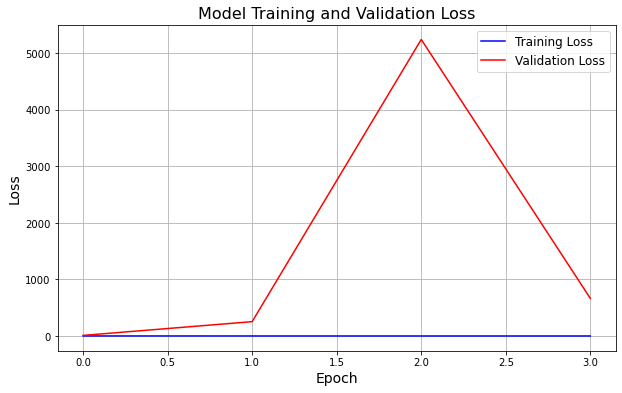

5/5 [==============================] - 3s 639ms/step - loss: 7.7429 - accuracy: 0.5814
resnet Test loss: 7.742885112762451, Test accuracy: 0.5813953280448914


In [44]:
run_pipeline('resnet')

#### DenseNet (Densely Connected Convolutional Networks)

loading... category : covid
loaded category:covid successfully
loading... category : normal
loaded category:normal successfully
Epoch 1/30
8/8 [==============================] - 42s 4s/step - loss: 0.5721 - accuracy: 0.7375 - val_loss: 0.6881 - val_accuracy: 0.5902
Epoch 2/30
8/8 [==============================] - 29s 4s/step - loss: 0.2441 - accuracy: 0.8667 - val_loss: 29.8566 - val_accuracy: 0.5574
Epoch 3/30
8/8 [==============================] - 29s 4s/step - loss: 0.2729 - accuracy: 0.9250 - val_loss: 22.2565 - val_accuracy: 0.4426
Epoch 4/30
8/8 [==============================] - 30s 4s/step - loss: 0.0798 - accuracy: 0.9667 - val_loss: 7.9402 - val_accuracy: 0.4426


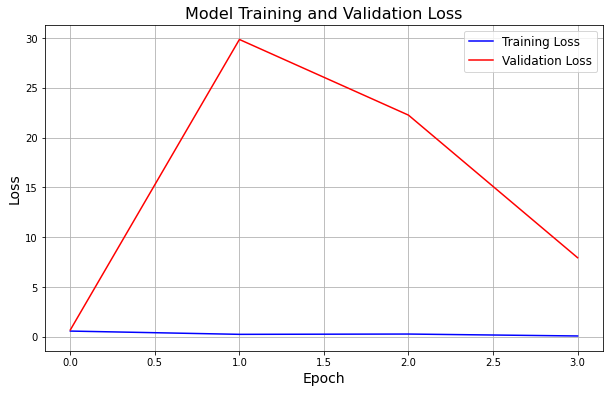

5/5 [==============================] - 4s 677ms/step - loss: 0.5755 - accuracy: 0.6512
densenet Test loss: 0.5755434632301331, Test accuracy: 0.6511628031730652


In [45]:
run_pipeline('densenet')

#### Inception Networks (like GoogleNet or InceptionV3)

loading... category : covid
loaded category:covid successfully
loading... category : normal
loaded category:normal successfully
Epoch 1/30
8/8 [==============================] - 23s 2s/step - loss: 0.6537 - accuracy: 0.7625 - val_loss: 2.9174 - val_accuracy: 0.6885
Epoch 2/30
8/8 [==============================] - 16s 2s/step - loss: 0.5052 - accuracy: 0.8625 - val_loss: 144.3888 - val_accuracy: 0.4426
Epoch 3/30
8/8 [==============================] - 16s 2s/step - loss: 0.2644 - accuracy: 0.9000 - val_loss: 8.8089 - val_accuracy: 0.6066
Epoch 4/30
8/8 [==============================] - 16s 2s/step - loss: 0.2467 - accuracy: 0.9208 - val_loss: 10.0155 - val_accuracy: 0.5902


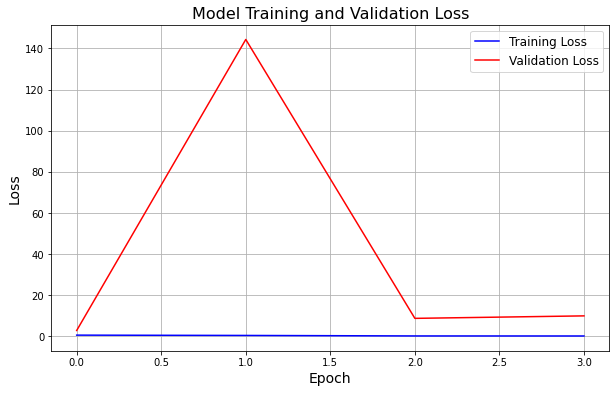

5/5 [==============================] - 2s 328ms/step - loss: 1.6103 - accuracy: 0.8140
inception Test loss: 1.6102938652038574, Test accuracy: 0.8139534592628479


In [46]:
run_pipeline('inception')

#### EfficientNet

loading... category : covid
loaded category:covid successfully
loading... category : normal
loaded category:normal successfully
Epoch 1/30
8/8 [==============================] - 21s 2s/step - loss: 0.4395 - accuracy: 0.7750 - val_loss: 0.7089 - val_accuracy: 0.5574
Epoch 2/30
8/8 [==============================] - 12s 2s/step - loss: 0.1338 - accuracy: 0.9542 - val_loss: 0.7159 - val_accuracy: 0.5574
Epoch 3/30
8/8 [==============================] - 12s 2s/step - loss: 0.1447 - accuracy: 0.9583 - val_loss: 1.1569 - val_accuracy: 0.5574
Epoch 4/30
8/8 [==============================] - 12s 2s/step - loss: 0.0651 - accuracy: 0.9875 - val_loss: 1.6813 - val_accuracy: 0.5574


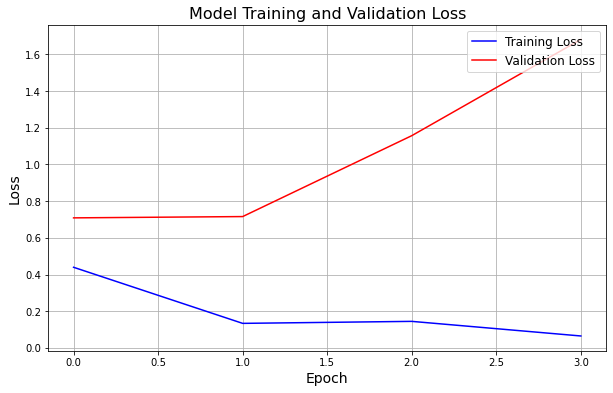

5/5 [==============================] - 2s 280ms/step - loss: 0.8004 - accuracy: 0.4186
efficientnet Test loss: 0.800369918346405, Test accuracy: 0.41860464215278625


In [47]:
run_pipeline('efficientnet')

#### VGGNet

loading... category : covid
loaded category:covid successfully
loading... category : normal
loaded category:normal successfully
Epoch 1/30
8/8 [==============================] - 51s 6s/step - loss: 10.2914 - accuracy: 0.4750 - val_loss: 0.6932 - val_accuracy: 0.4426
Epoch 2/30
8/8 [==============================] - 50s 6s/step - loss: 0.6930 - accuracy: 0.6167 - val_loss: 0.6933 - val_accuracy: 0.4426
Epoch 3/30
8/8 [==============================] - 51s 6s/step - loss: 0.9637 - accuracy: 0.6167 - val_loss: 0.6933 - val_accuracy: 0.4426
Epoch 4/30
8/8 [==============================] - 50s 6s/step - loss: 0.6928 - accuracy: 0.5875 - val_loss: 0.8276 - val_accuracy: 0.4426


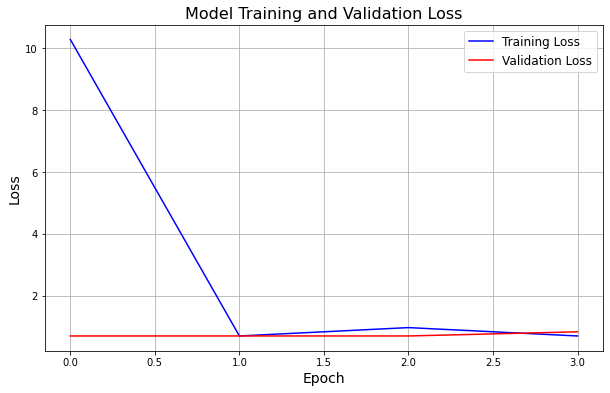

5/5 [==============================] - 7s 1s/step - loss: 0.6931 - accuracy: 0.5814
vggnet Test loss: 0.6931423544883728, Test accuracy: 0.5813953280448914


In [48]:
run_pipeline('vggnet')

#### MobileNet

loading... category : covid
loaded category:covid successfully
loading... category : normal
loaded category:normal successfully
17225924/17225924 [==============================] - 2s 0us/step
Epoch 1/30
8/8 [==============================] - 10s 962ms/step - loss: 0.6304 - accuracy: 0.7542 - val_loss: 3.3822 - val_accuracy: 0.5738
Epoch 2/30
8/8 [==============================] - 7s 847ms/step - loss: 0.3286 - accuracy: 0.9208 - val_loss: 3.6942 - val_accuracy: 0.5738
Epoch 3/30
8/8 [==============================] - 7s 840ms/step - loss: 0.0621 - accuracy: 0.9750 - val_loss: 7.6106 - val_accuracy: 0.5574
Epoch 4/30
8/8 [==============================] - 7s 842ms/step - loss: 0.0637 - accuracy: 0.9750 - val_loss: 9.8356 - val_accuracy: 0.5574


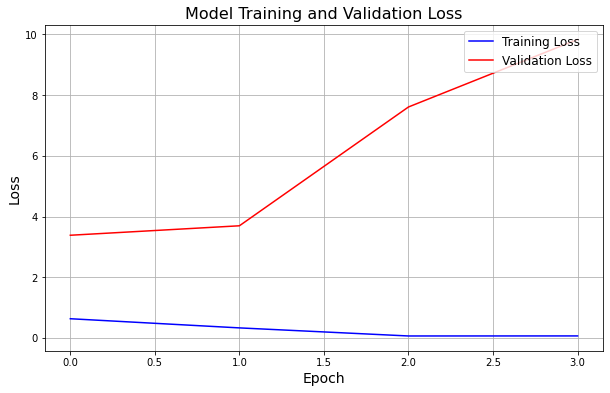

5/5 [==============================] - 1s 146ms/step - loss: 3.9063 - accuracy: 0.4574
mobilenet Test loss: 3.906311273574829, Test accuracy: 0.45736435055732727


In [49]:
run_pipeline('mobilenet')